In [1]:
import numpy as np 
import pandas as pd

In [2]:
data=pd.read_csv(r"C:\Users\SREEVIBU\OneDrive\Desktop\TEST\direct_reports_dataset (1).csv")

In [3]:
df=pd.DataFrame(data)
df

,employee_id,position,managers_id
0,1001,Analytics Manager,1013.0
1,1002,Data Engineer,1007.0
2,1003,Data Engineer,1001.0
3,1004,Database Developer,1017.0
4,1005,Data Analyst,1001.0
...,...,...,...
95,2077,Data Scientist,1017.0
96,2078,Database Developer,1007.0
97,2079,Data Scientist,1017.0
98,2080,Data Scientist,1017.0


In [4]:

df.head(10)

,employee_id,position,managers_id
0,1001,Analytics Manager,1013.0
1,1002,Data Engineer,1007.0
2,1003,Data Engineer,1001.0
3,1004,Database Developer,1017.0
4,1005,Data Analyst,1001.0
5,1006,Data Engineer,1017.0
6,1007,Data Engineering Manager,1013.0
7,1008,Database Developer,1001.0
8,1009,Data Engineer,1007.0
9,1010,Data Scientist,1017.0


In [5]:
df.shape

(100, 3)

In [6]:
empty=df.isnull().sum()
empty

employee_id    0
position       0
managers_id    4
dtype: int64

In [7]:
duplicate=df.duplicated().sum()
duplicate

np.int64(0)

In [8]:
df.describe()

,employee_id,managers_id
count,100.000000,96.000000
mean,1845.110000,1009.729167
std,407.056691,6.122399
min,1001.000000,1001.000000
25%,2006.750000,1007.000000
50%,2031.500000,1007.000000
75%,2056.250000,1017.000000
max,2081.000000,1017.000000


In [9]:
managers = df[df['position'].str.contains("Manager", case=False)]
print(managers)

    employee_id                  position  managers_id
0          1001         Analytics Manager       1013.0
6          1007  Data Engineering Manager       1013.0
16         1017      Data Science Manager       1013.0
28         2010  Data Engineering Manager       1013.0
30         2012         Analytics Manager       1013.0
31         2013      Data Science Manager       1013.0
32         2014      Data Science Manager       1013.0
33         2015         Analytics Manager       1013.0
37         2019      Data Science Manager       1013.0
38         2020  Data Engineering Manager       1013.0
41         2023  Data Engineering Manager       1013.0
44         2026      Data Science Manager       1013.0
62         2044      Data Science Manager       1013.0
72         2054         Analytics Manager       1013.0
73         2055  Data Engineering Manager       1013.0
83         2065      Data Science Manager       1013.0
86         2068         Analytics Manager       1013.0
89        

In [10]:
direct_reports = df.groupby("managers_id")['employee_id'].count().reset_index()
direct_reports.columns = ["manager_id", "direct_reports"]
print(direct_reports)

   manager_id  direct_reports
0      1001.0              22
1      1007.0              27
2      1013.0              19
3      1017.0              28


In [11]:
direct_reports = direct_reports.merge(df[['employee_id','position']],left_on="manager_id", right_on="employee_id", how="left")
print(direct_reports)

   manager_id  direct_reports  employee_id                  position
0      1001.0              22         1001         Analytics Manager
1      1007.0              27         1007  Data Engineering Manager
2      1013.0              19         1013                       CTO
3      1017.0              28         1017      Data Science Manager


In [12]:
top_manager = direct_reports.loc[direct_reports['direct_reports'].idxmax()]
print("Top Manager:", top_manager)

Top Manager: manager_id                      1017.0
direct_reports                      28
employee_id                       1017
position          Data Science Manager
Name: 3, dtype: object


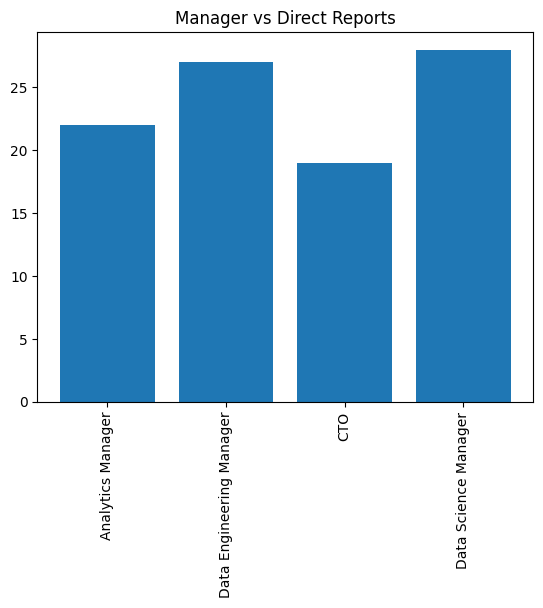

In [13]:
import matplotlib.pyplot as plt
plt.bar(direct_reports['position'], direct_reports['direct_reports'])
plt.xticks(rotation=90)
plt.title("Manager vs Direct Reports")
plt.show()

In [14]:
avg = direct_reports['direct_reports'].mean()
avg

np.float64(24.0)

In [15]:
med = direct_reports['direct_reports'].median()
med

np.float64(24.5)

In [16]:
mode = direct_reports['direct_reports'].mode()[0]
mode


np.int64(19)

In [17]:
cto_id = df[df['position'].str.contains("CTO", case=False)]['employee_id'].iloc[0]
prob = (df['managers_id'] == cto_id).mean()
print("Probability reports to CTO:", prob)

Probability reports to CTO: 0.19


In [18]:

reports_array = direct_reports['direct_reports'].to_numpy()
influence = np.full_like(reports_array, 1.5, dtype=float)

print("Direct Reports:", reports_array)
print("Influence:", influence)

print("Addition:", reports_array + influence)
print("Subtraction:", reports_array - influence)
print("Dot Product:", np.dot(reports_array, influence))
print("Matrix Multiply:", reports_array @ influence)

Direct Reports: [22 27 19 28]
Influence: [1.5 1.5 1.5 1.5]
Addition: [23.5 28.5 20.5 29.5]
Subtraction: [20.5 25.5 17.5 26.5]
Dot Product: 144.0
Matrix Multiply: 144.0


In [19]:
import sympy as sp
D, E, M = sp.symbols('Direct_Reports Efficiency_Factor Manager_Experience')

Productivity = (D * E) / M
derivative = sp.diff(Productivity, D)
print("Derivative wrt Direct Reports:", derivative)

Derivative wrt Direct Reports: Efficiency_Factor/Manager_Experience


In [20]:
df = df.merge(direct_reports[['manager_id','direct_reports']],
              left_on='employee_id', right_on='manager_id', how='left')
df['direct_reports'] = df['direct_reports'].fillna(0)

df['is_manager'] = df['position'].str.contains("Manager", case=False).astype(int)

df['high_team_size'] = (df['direct_reports'] > avg).astype(int)

manager_ranking = df[df['is_manager']==1].sort_values(by="direct_reports", ascending=False)
print(manager_ranking[['employee_id','position','direct_reports']])

    employee_id                  position  direct_reports
16         1017      Data Science Manager            28.0
6          1007  Data Engineering Manager            27.0
0          1001         Analytics Manager            22.0
28         2010  Data Engineering Manager             0.0
30         2012         Analytics Manager             0.0
31         2013      Data Science Manager             0.0
32         2014      Data Science Manager             0.0
33         2015         Analytics Manager             0.0
37         2019      Data Science Manager             0.0
38         2020  Data Engineering Manager             0.0
41         2023  Data Engineering Manager             0.0
44         2026      Data Science Manager             0.0
62         2044      Data Science Manager             0.0
72         2054         Analytics Manager             0.0
73         2055  Data Engineering Manager             0.0
83         2065      Data Science Manager             0.0
86         206

In [21]:
print(manager_ranking[manager_ranking['direct_reports'] > 3])

print(manager_ranking.sort_values(by=['direct_reports','employee_id'], ascending=[False,True]))

def get_team_size(manager_id):
    team = df[df['managers_id']==manager_id]['employee_id'].tolist()
    total = len(team)
    for emp in team:
        total += get_team_size(emp)
    return total

df['total_team_size'] = df['employee_id'].apply(get_team_size)
print(df[['employee_id','position','total_team_size']])

    employee_id                  position  managers_id  manager_id  \
16         1017      Data Science Manager       1013.0      1017.0   
6          1007  Data Engineering Manager       1013.0      1007.0   
0          1001         Analytics Manager       1013.0      1001.0   

    direct_reports  is_manager  high_team_size  
16            28.0           1               1  
6             27.0           1               1  
0             22.0           1               0  
    employee_id                  position  managers_id  manager_id  \
16         1017      Data Science Manager       1013.0      1017.0   
6          1007  Data Engineering Manager       1013.0      1007.0   
0          1001         Analytics Manager       1013.0      1001.0   
28         2010  Data Engineering Manager       1013.0         NaN   
30         2012         Analytics Manager       1013.0         NaN   
31         2013      Data Science Manager       1013.0         NaN   
32         2014      Data Science

In [22]:
largest_team = df.loc[df['total_team_size'].idxmax()]
print("Largest team:", largest_team)

print("Average team size:", df['direct_reports'].mean())

print(df[df['direct_reports'] < avg][['employee_id','position','direct_reports']])

df['title_prefix'] = df['position'].str.split().str[0]
print(df.groupby('title_prefix')['direct_reports'].mean())

Largest team: employee_id          1013
position              CTO
managers_id           NaN
manager_id         1013.0
direct_reports       19.0
is_manager              0
high_team_size          0
total_team_size        96
Name: 12, dtype: object
Average team size: 0.96
    employee_id            position  direct_reports
0          1001   Analytics Manager            22.0
1          1002       Data Engineer             0.0
2          1003       Data Engineer             0.0
3          1004  Database Developer             0.0
4          1005        Data Analyst             0.0
..          ...                 ...             ...
95         2077      Data Scientist             0.0
96         2078  Database Developer             0.0
97         2079      Data Scientist             0.0
98         2080      Data Scientist             0.0
99         2081        Data Analyst             0.0

[98 rows x 3 columns]
title_prefix
Analytics    3.666667
CTO          4.750000
Data         0.763889
Data